In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)


In [12]:
# 1. Dataset
data = [
    ['milk', 'bread', 'eggs'],
    ['milk', 'bread'],
    ['milk', 'eggs'],
    ['bread', 'butter'],
    ['bread', 'eggs'],
    ['milk', 'bread', 'butter', 'eggs'],
    ['butter', 'eggs']
]



In [13]:
# Convert transactions to one-hot encoded DataFrame
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)
print("\nSample Transaction DataFrame:")
print(df.head())




Sample Transaction DataFrame:
   bread  butter   eggs   milk
0   True   False   True   True
1   True   False  False   True
2  False   False   True   True
3   True    True  False  False
4   True   False   True  False


In [14]:
# ----------------------------
# 2. Apply Apriori Algorithm (Optimized)
# ----------------------------
min_support = 0.3  # Adjustable threshold
frequent_itemsets_apriori = apriori(df, min_support=min_support, use_colnames=True)
frequent_itemsets_apriori['length'] = frequent_itemsets_apriori['itemsets'].apply(lambda x: len(x))
print("\nFrequent Itemsets (Apriori):")
print(frequent_itemsets_apriori.sort_values(['support', 'length'], ascending=[False, True]))



Frequent Itemsets (Apriori):
    support       itemsets  length
0  0.714286        (bread)       1
2  0.714286         (eggs)       1
3  0.571429         (milk)       1
1  0.428571       (butter)       1
4  0.428571  (eggs, bread)       2
5  0.428571  (bread, milk)       2
6  0.428571   (eggs, milk)       2


In [15]:

# Generate association rules
rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1)
rules_apriori = rules_apriori.sort_values(['lift','confidence'], ascending=False)
print("\nAssociation Rules (Apriori):")
print(rules_apriori[['antecedents','consequents','support','confidence','lift']])




Association Rules (Apriori):
  antecedents consequents   support  confidence  lift
1      (milk)     (bread)  0.428571        0.75  1.05
3      (milk)      (eggs)  0.428571        0.75  1.05
0     (bread)      (milk)  0.428571        0.60  1.05
2      (eggs)      (milk)  0.428571        0.60  1.05


In [16]:
# ----------------------------
# 3. Apply FP-Growth Algorithm (Faster for Large Data)
# ----------------------------
frequent_itemsets_fp = fpgrowth(df, min_support=min_support, use_colnames=True)
frequent_itemsets_fp['length'] = frequent_itemsets_fp['itemsets'].apply(lambda x: len(x))
print("\nFrequent Itemsets (FP-Growth):")
print(frequent_itemsets_fp.sort_values(['support', 'length'], ascending=[False, True]))

rules_fp = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=1)
rules_fp = rules_fp.sort_values(['lift','confidence'], ascending=False)
print("\nAssociation Rules (FP-Growth):")
print(rules_fp[['antecedents','consequents','support','confidence','lift']])




Frequent Itemsets (FP-Growth):
    support       itemsets  length
0  0.714286         (eggs)       1
1  0.714286        (bread)       1
2  0.571429         (milk)       1
3  0.428571       (butter)       1
4  0.428571  (eggs, bread)       2
5  0.428571  (bread, milk)       2
6  0.428571   (eggs, milk)       2

Association Rules (FP-Growth):
  antecedents consequents   support  confidence  lift
1      (milk)     (bread)  0.428571        0.75  1.05
3      (milk)      (eggs)  0.428571        0.75  1.05
0     (bread)      (milk)  0.428571        0.60  1.05
2      (eggs)      (milk)  0.428571        0.60  1.05


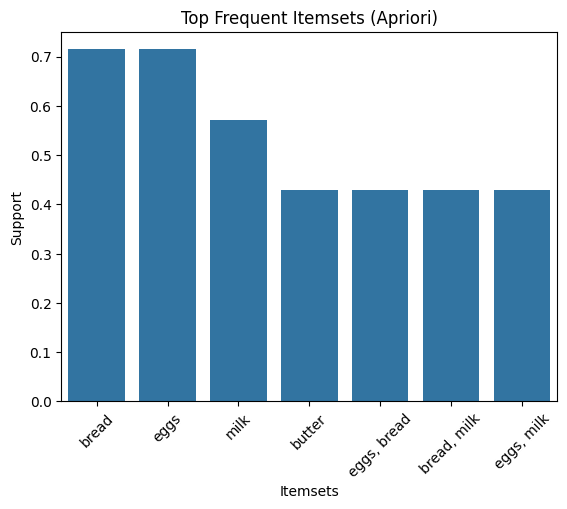

In [20]:
# ----------------------------
# 4. Visualization: Frequent Itemsets
# ----------------------------
top_itemsets = frequent_itemsets_apriori.sort_values('support', ascending=False).head(10)
sns.barplot(x=[', '.join(list(x)) for x in top_itemsets['itemsets']], y=top_itemsets['support'])
plt.title('Top Frequent Itemsets (Apriori)')
plt.ylabel('Support')
plt.xlabel('Itemsets')
plt.xticks(rotation=45)
plt.show()

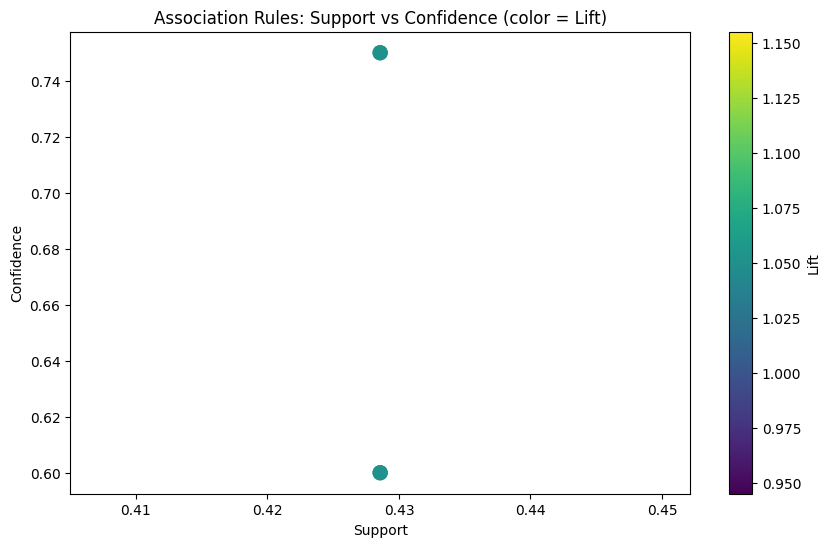

In [21]:
# ----------------------------
# 5. Visualization: Association Rules - Scatter Plot
# ----------------------------
plt.figure(figsize=(10,6))
scatter = plt.scatter(rules_apriori['support'], rules_apriori['confidence'],
c=rules_apriori['lift'], cmap='viridis', s=100)
plt.colorbar(scatter, label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence (color = Lift)')
plt.show()



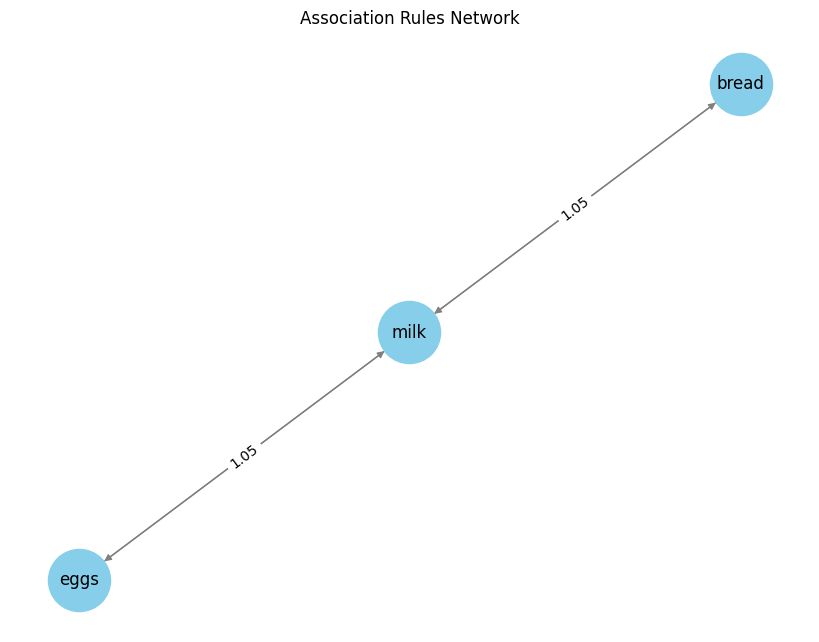

In [19]:
# Optional: Network visualization of rules
import networkx as nx
G = nx.DiGraph()
for _, row in rules_apriori.iterrows():
    for antecedent in row['antecedents']:
        for consequent in row['consequents']:
            G.add_edge(antecedent, consequent, weight=row['lift'])

plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, k=1)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u,v): f'{d["weight"]:.2f}' for u,v,d in G.edges(data=True)})
plt.title('Association Rules Network')
plt.show()
